In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/feed-input-values/prediction_force_plot_4.html
/kaggle/input/feed-input-values/prediction_force_plot_1.html
/kaggle/input/feed-input-values/prediction_force_plot_3.html
/kaggle/input/feed-input-values/force_plot_1.html
/kaggle/input/feed-input-values/top_5_predictions_v1.0.csv
/kaggle/input/feed-input-values/prediction_force_plot_0.html
/kaggle/input/feed-input-values/top_5_predictions_force_plot_1.html
/kaggle/input/feed-input-values/prediction_force_plot_2.html
/kaggle/input/feed-input-values/force_plot_2.html


SHAP Values Shape: (1, 5, 15)
Interaction Matrix Shape: (5, 15)
Updated Interaction Matrix Shape: (15, 15)
Sorted Indices: [ 4  3  2  1  0 14 13 12 11 10  9  8  7  6  5]
Sorted Interaction Matrix Shape: (15, 15)


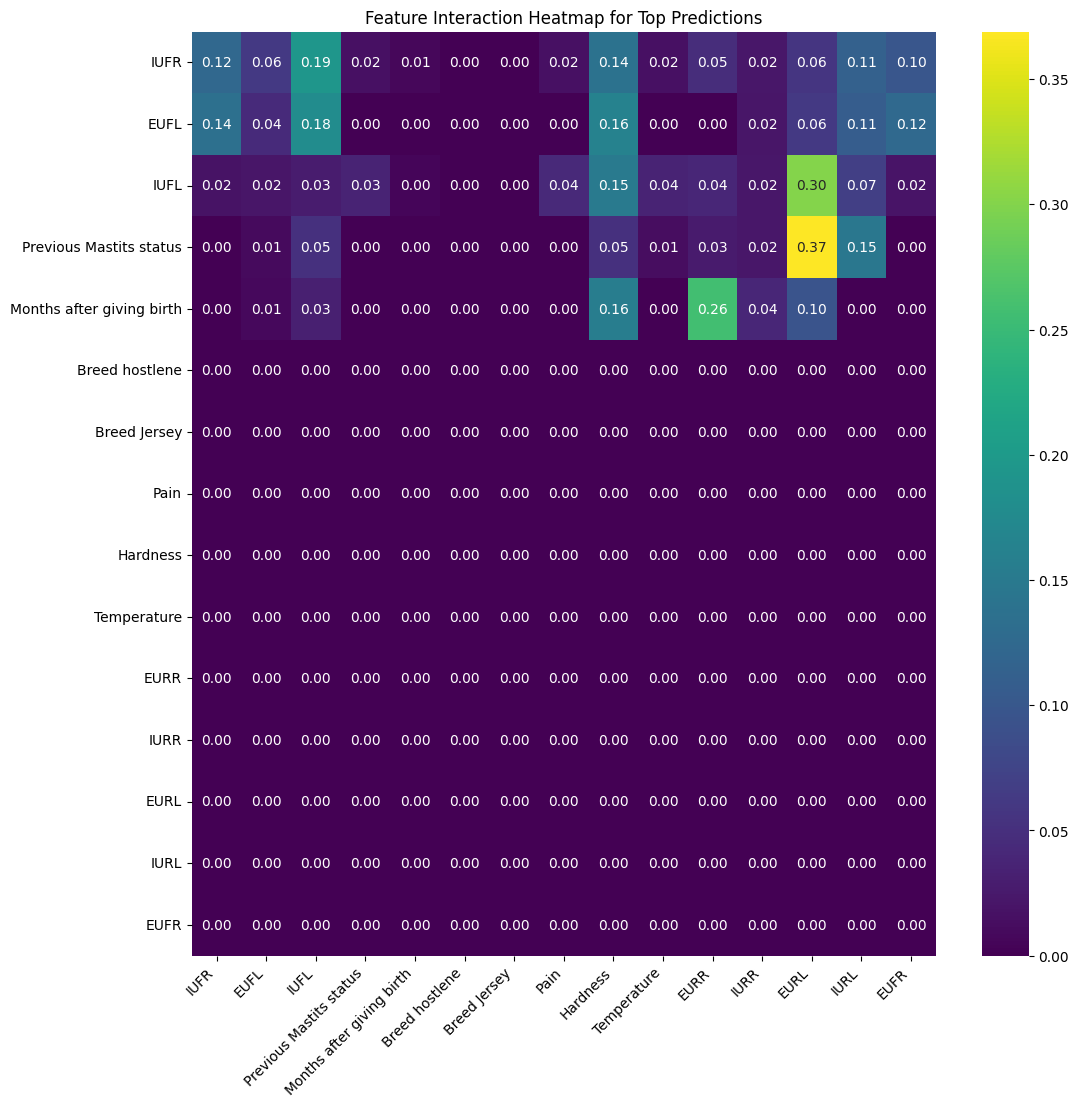

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap

# Example feature names (replace with actual feature names if available)
feature_names = ['Months after giving birth', 'Previous Mastits status', 'IUFL', 'EUFL', 'IUFR', 'EUFR', 
                 'IURL', 'EURL', 'IURR', 'EURR', 'Temperature', 'Hardness', 'Pain', 'Breed Jersey', 'Breed hostlene']

# Sample SHAP values (replace this with your actual SHAP values)
shap_values = np.array([
    [[0, 0, 0.03192641, 0.00782307, 0, 0, 0, 0.09512947, 0.03906814, 0.25685355, 0, 0.15512901, 0, 0, 0],
     [0, 0, 0.05082025, 0.00999446, 0, 0, 0.14560062, 0.36893718, 0.02206213, 0.02687887, 0.01233808, -0.05146047, 0, 0, 0],
     [0.00452053, 0.03482086, 0.0283639, 0.02085395, 0.01743837, 0.01924703, 0.06873251, 0.30058189, -0.02180237, 0.03923384, -0.03568585, 0.15100439, -0.04213793, 0, 0],
     [0, 0, 0.17838748, 0.04410173, 0.13539444, -0.12443987, 0.10736341, 0.06129026, 0.02028389, 0, 0, 0.16361043, 0, 0, 0],
     [0.00596177, 0.01525119, 0.19372157, 0.06140285, 0.12269745, -0.09845727, 0.11279211, 0.05757866, 0.02263279, -0.04647302, -0.01574117, 0.1392429, 0.01538194, 0, 0]]
])

# Verify the shape of shap_values
print("SHAP Values Shape:", shap_values.shape)

# Ensure shap_values is a 3D array
if len(shap_values.shape) == 1:
    shap_values = shap_values[0]

# Calculate interaction matrix by summing the absolute SHAP values
interaction_matrix = np.abs(shap_values).sum(axis=0)

# Verify the shape of the interaction matrix
print("Interaction Matrix Shape:", interaction_matrix.shape)

# Ensure the interaction matrix covers all features
if interaction_matrix.shape[0] != len(feature_names):
    print("Warning: Mismatch between interaction matrix and feature names")
    # Padding or handling mismatch if necessary
    if interaction_matrix.shape[0] < len(feature_names):
        # Pad the interaction matrix with zeros to match the feature names length
        padded_interaction_matrix = np.zeros((len(feature_names), len(feature_names)))
        padded_interaction_matrix[:interaction_matrix.shape[0], :interaction_matrix.shape[1]] = interaction_matrix
        interaction_matrix = padded_interaction_matrix

# Verify the updated shape of the interaction matrix
print("Updated Interaction Matrix Shape:", interaction_matrix.shape)

# Sort the interaction matrix for better visualization
sorted_indices = np.argsort(interaction_matrix.sum(axis=1))[::-1]
sorted_interaction_matrix = interaction_matrix[sorted_indices][:, sorted_indices]

# Debug: Print sorted indices and interaction matrix
print("Sorted Indices:", sorted_indices)
print("Sorted Interaction Matrix Shape:", sorted_interaction_matrix.shape)

# Create the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(sorted_interaction_matrix, annot=True, fmt=".2f", xticklabels=np.array(feature_names)[sorted_indices], yticklabels=np.array(feature_names)[sorted_indices], cmap="viridis")
plt.title("Feature Interaction Heatmap for Top Predictions")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


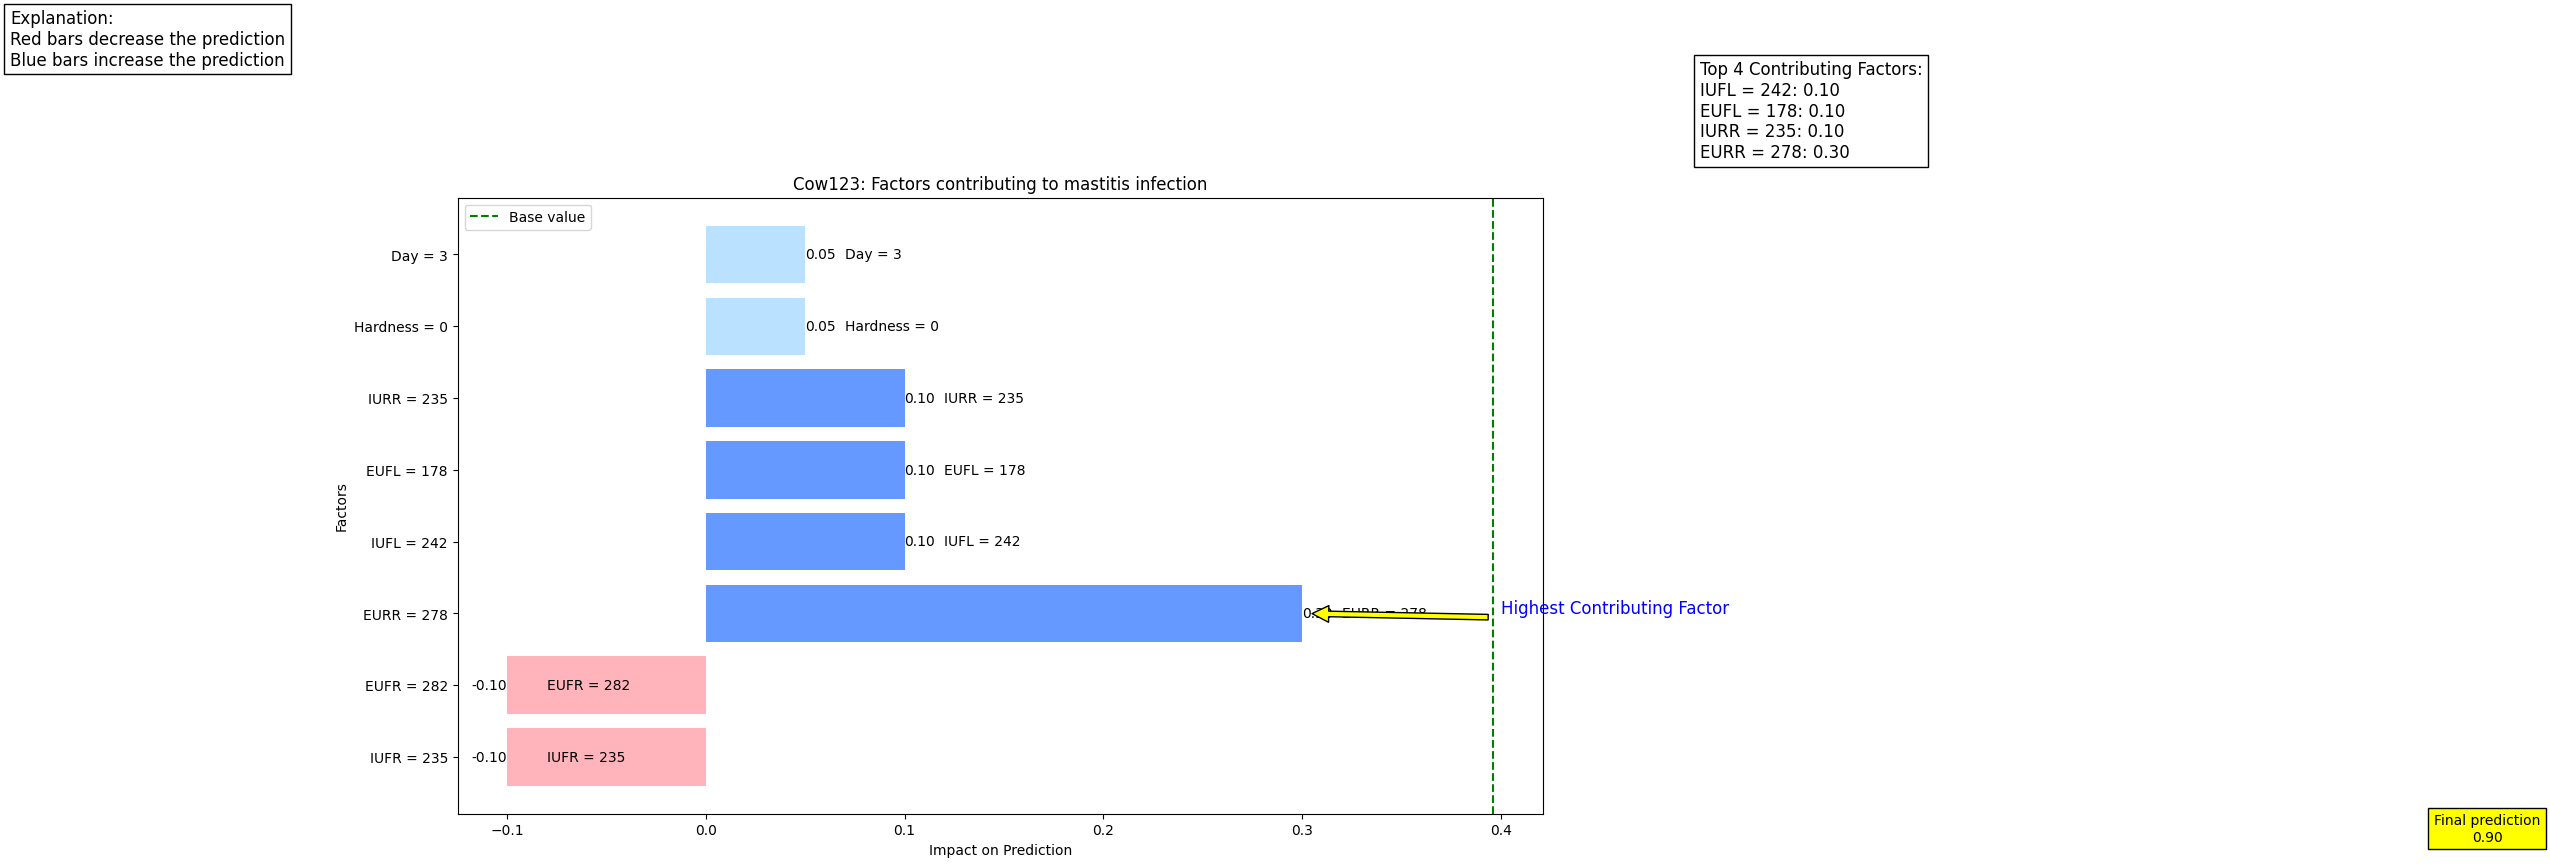

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Load your SHAP values and feature names from the provided data
features = ["IUFR = 235", "EUFR = 282", "EURR = 278", "IUFL = 242", "EUFL = 178", "IURR = 235", "Hardness = 0", "Day = 3"]
shap_values = [-0.1, -0.1, 0.3, 0.1, 0.1, 0.1, 0.05, 0.05]
base_value = 0.3962
final_prediction = base_value + sum(shap_values)

# Pastel colors for the bars
colors = ['#FFB3BA' if val < 0 else '#BAE1FF' for val in shap_values]

# Identify the top 4 contributing factors by absolute SHAP value
top_4_indices = np.argsort(np.abs(shap_values))[-4:]

# Highlight top 4 contributing factors
highlight_colors = ['#FF6666' if val < 0 else '#6699FF' for val in shap_values]
for i in top_4_indices:
    colors[i] = highlight_colors[i]

# Positions for the bars
positions = np.arange(len(features))

# Create the plot
plt.figure(figsize=(14, 8))
bars = plt.barh(positions, shap_values, color=colors)

# Add the base value as a vertical line
plt.axvline(base_value, color='green', linestyle='--', label='Base value')

# Add annotations for the SHAP values and feature names
for bar, feature, val in zip(bars, features, shap_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{val:.2f}', va='center', ha='left' if val > 0 else 'right', color='black')
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, feature, va='center', ha='left', color='black')

# Add explanations for the top 4 contributing factors
explanation_text = 'Top 4 Contributing Factors:\n'
for i in top_4_indices:
    explanation_text += f"{features[i]}: {shap_values[i]:.2f}\n"
plt.text(0.5, len(features) + 1, explanation_text.strip(), va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

# Highlight the highest contributing factor
max_shap_value = max(shap_values, key=abs)
max_feature_index = shap_values.index(max_shap_value)
plt.annotate('Highest Contributing Factor',
             xy=(shap_values[max_feature_index], max_feature_index),
             xytext=(shap_values[max_feature_index] + 0.1, max_feature_index),
             arrowprops=dict(facecolor='yellow', shrink=0.05),
             fontsize=12, color='blue', ha='left')

# Add the final prediction as an annotation
plt.text(final_prediction, -1, f'Final prediction\n{final_prediction:.2f}', va='center', ha='center', color='black', bbox=dict(facecolor='yellow', edgecolor='black'))

# Set labels and title
plt.xlabel('Impact on Prediction')
plt.ylabel('Factors')
plt.title('Cow123: Factors contributing to mastitis infection')
plt.yticks(positions, features)

# Add explanation for colors
plt.text(-0.35, len(features) + 2, 'Explanation:\nRed bars decrease the prediction\nBlue bars increase the prediction',
         va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

plt.legend()

plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import os

# Load the CSV file containing feature values
csv_file_path = '/kaggle/input/feed-input-values/top_5_predictions_v1.0.csv'
df = pd.read_csv(csv_file_path)

# Extract feature names
feature_names = df.columns[:-2].tolist()  # Exclude 'Predicted Probability' and 'Actual Label'

print(df)

print(feature_names)

# Directory containing the force plot files (assuming they are named prediction_force_plot_0.html, ...)
force_plot_dir = '/kaggle/input/feed-input-values/'
force_plot_files = [
    'prediction_force_plot_0.html',
    'prediction_force_plot_1.html',
    'prediction_force_plot_2.html',
    'prediction_force_plot_3.html',
    'prediction_force_plot_4.html'
]

#  SHAP values 
shap_values_list = [
    np.array([ 0.01443965, -0.02439692,  0.26422608,  0.04960858,  0.03760694,
          0.08268315,  0.02592668,  0.        ,  0.03406766,  0.01915966,
         -0.03628263,  0.07490624,  0.        ,  0.        ,  0.        ]),
    np.array([ 0.00869496,  0.03466067,  0.26684976,  0.04131494,  0.01966748,
          0.07677135, -0.0167326 ,  0.        ,  0.        ,  0.05435848,
         -0.03003777,  0.07496232,  0.01143548,  0.        ,  0.        ]),
    np.array([ 0.        ,  0.        ,  0.08053359,  0.        ,  0.18740966,
          0.11863765,  0.        , -0.09073157,  0.10264747,  0.08297525,
          0.02083697,  0.0388029 ,  0.        ,  0.        ,  0.        ]),
    np.array([ 0.03411106, -0.02098891,  0.05805447,  0.        ,  0.20091017,
          0.09405624,  0.        , -0.07864671,  0.10240343,  0.08549323,
          0.        ,  0.06571803,  0.        ,  0.        ,  0.        ]),
    np.array([ 0.01734611, -0.05506631,  0.        ,  0.01039771,  0.03012372,
         -0.04213727,  0.11171462,  0.3875449 ,  0.03358792, -0.02792205,
          0.00887182,  0.09547795, -0.02896119,  0.        ,  0.        ])
]
# Example base value 
base_value = 0.3962



   Months after giving birth  Previous_Mastits_status  IUFL  EUFL  IUFR  EUFR  \
0                          3                        0   307   362   241   280   
1                          5                        0   242   286   241   287   
2                          6                        0   156   181   337   384   
3                          6                        0   304   354   238   282   
4                          3                        0   161   185   302   364   

   IURL  EURL  IURR  EURR  Temperature  Hardness  Pain  Breed_Jersey  \
0   233   282   234   275           45         1     0             1   
1   310   361   246   285           43         0     0             1   
2   153   183   151   186           45         0     1             1   
3   240   276   239   274           46         1     1             1   
4   157   190   157   189           49         1     1             1   

   Breed_hostlene  Predicted Probability  Actual Label  
0               0      

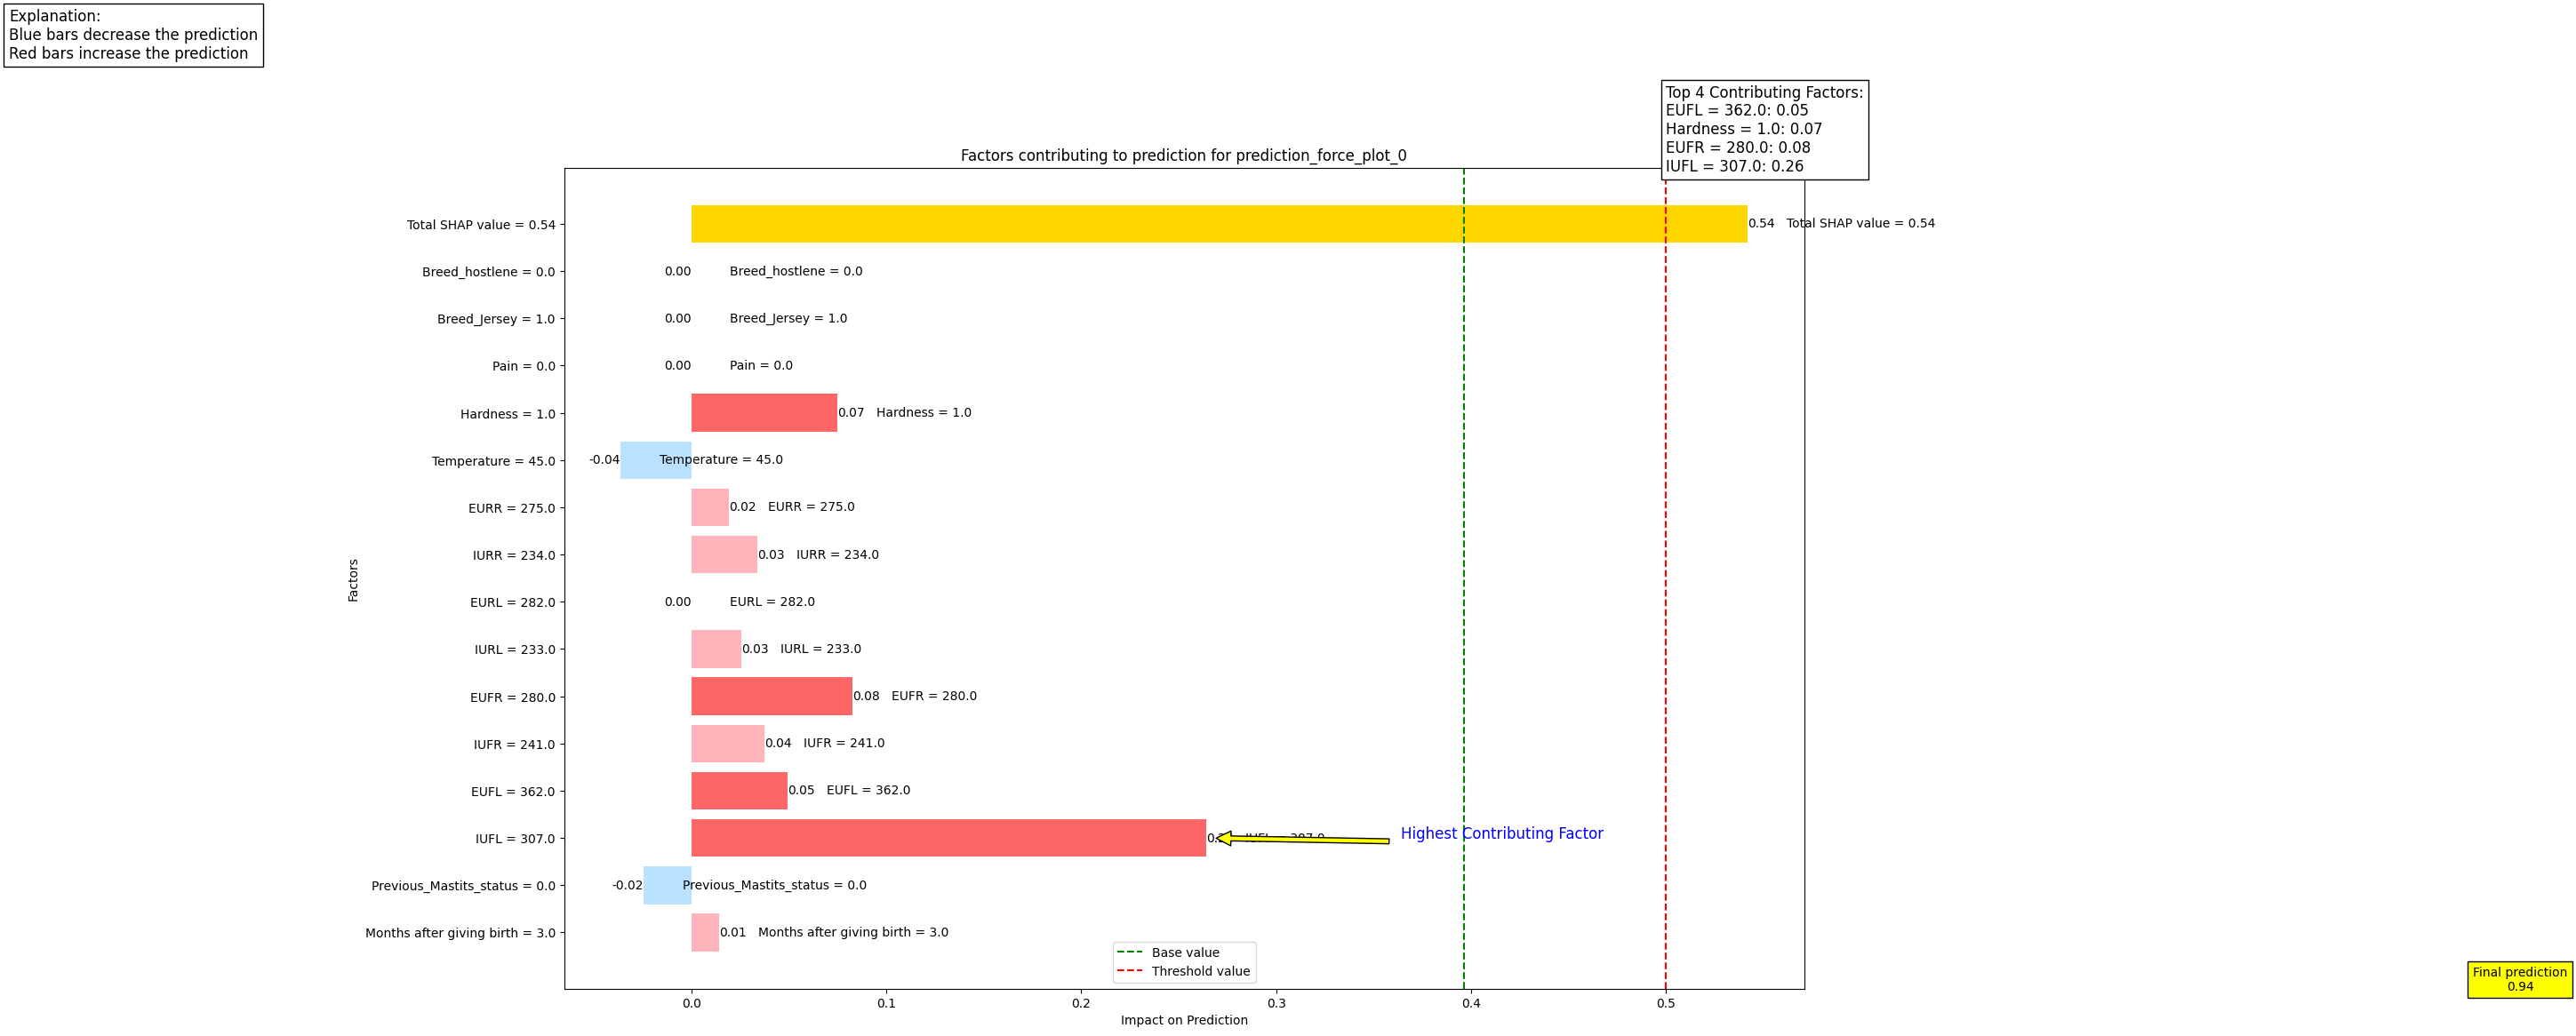

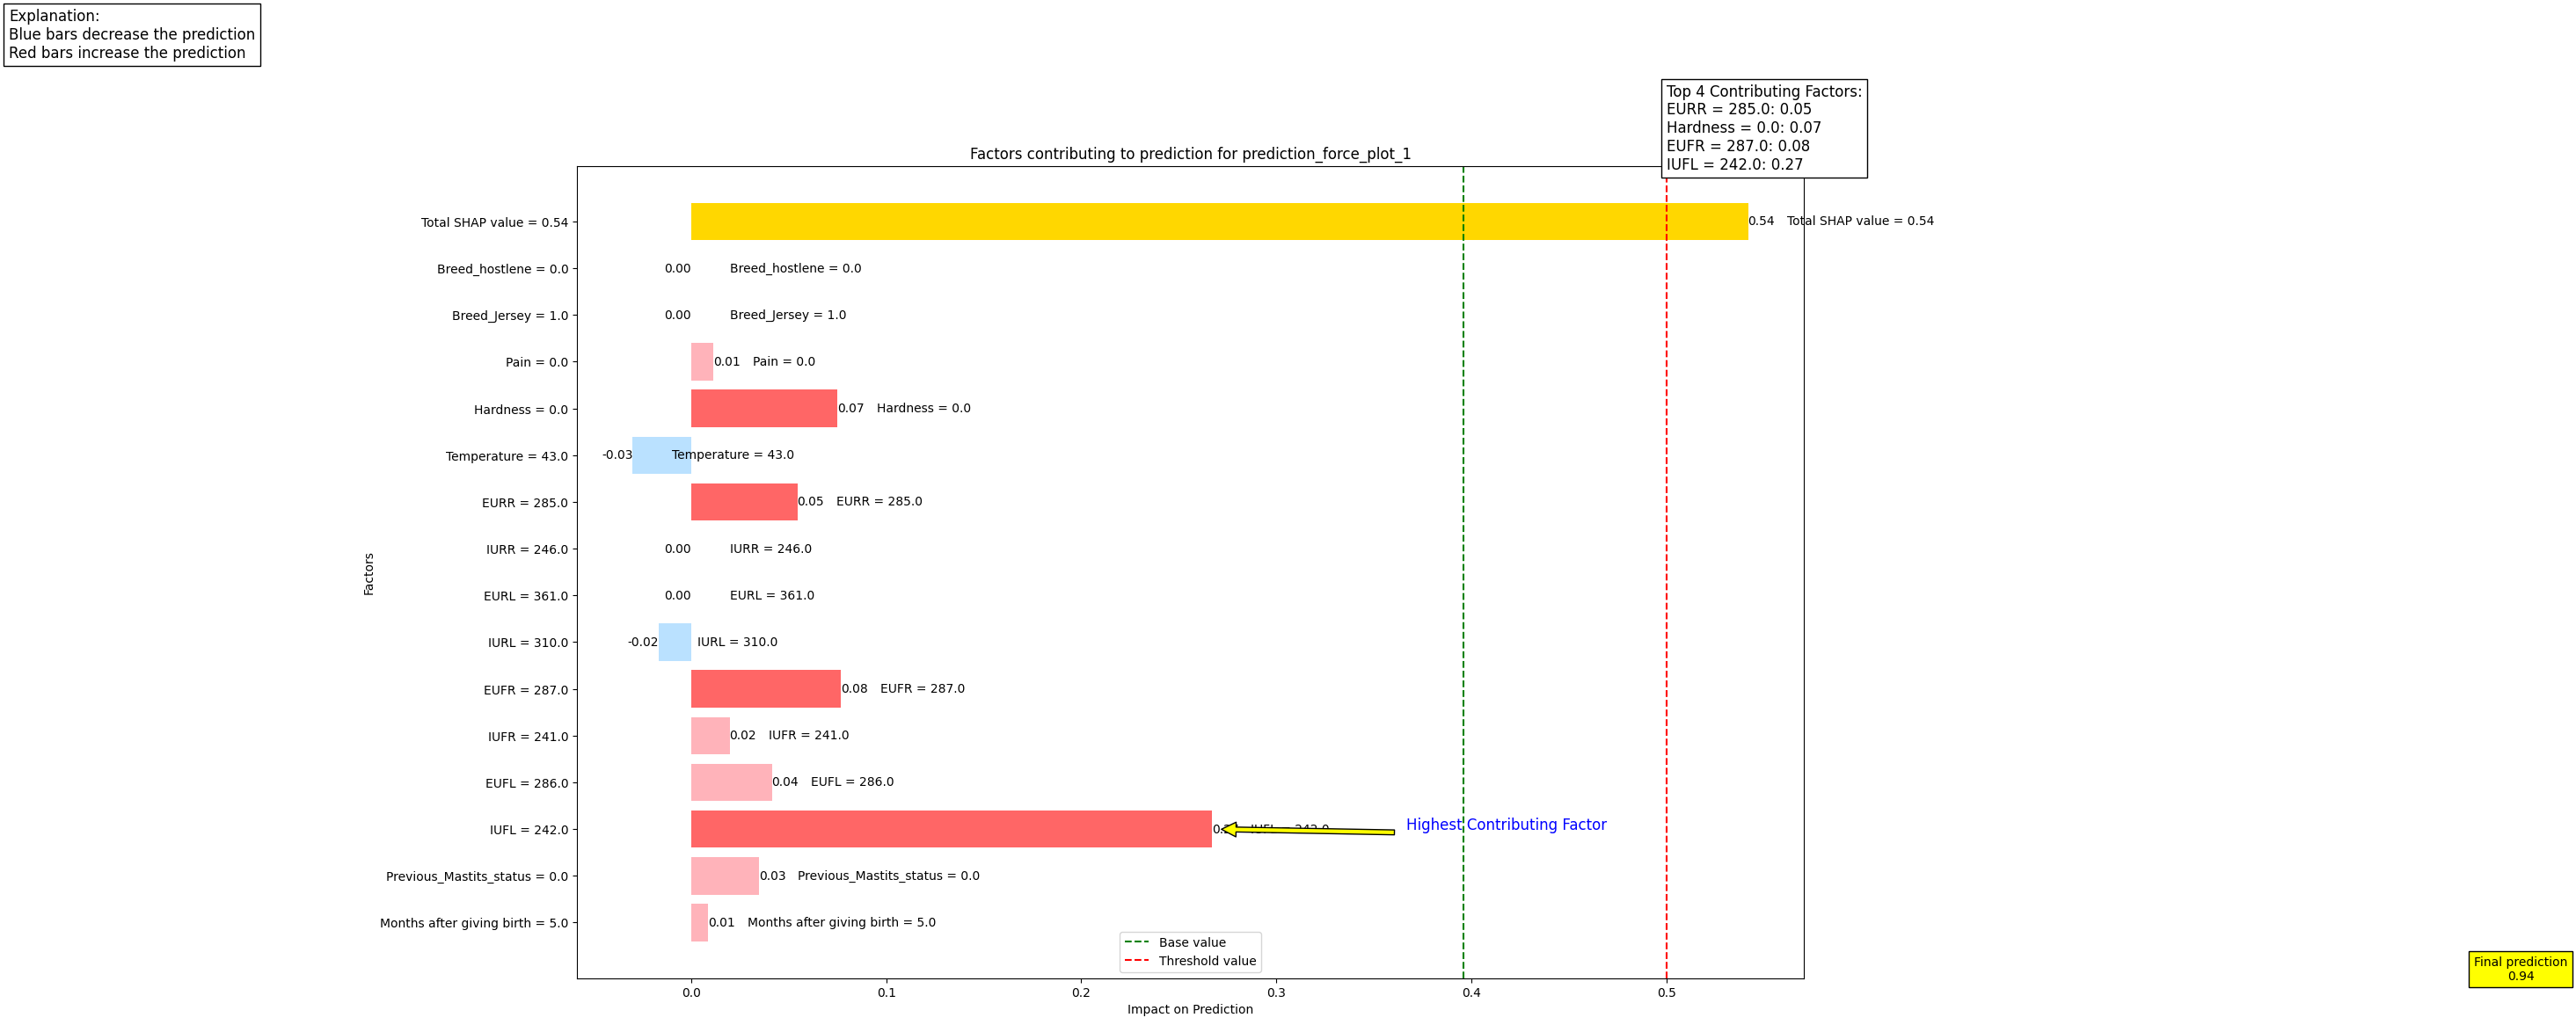

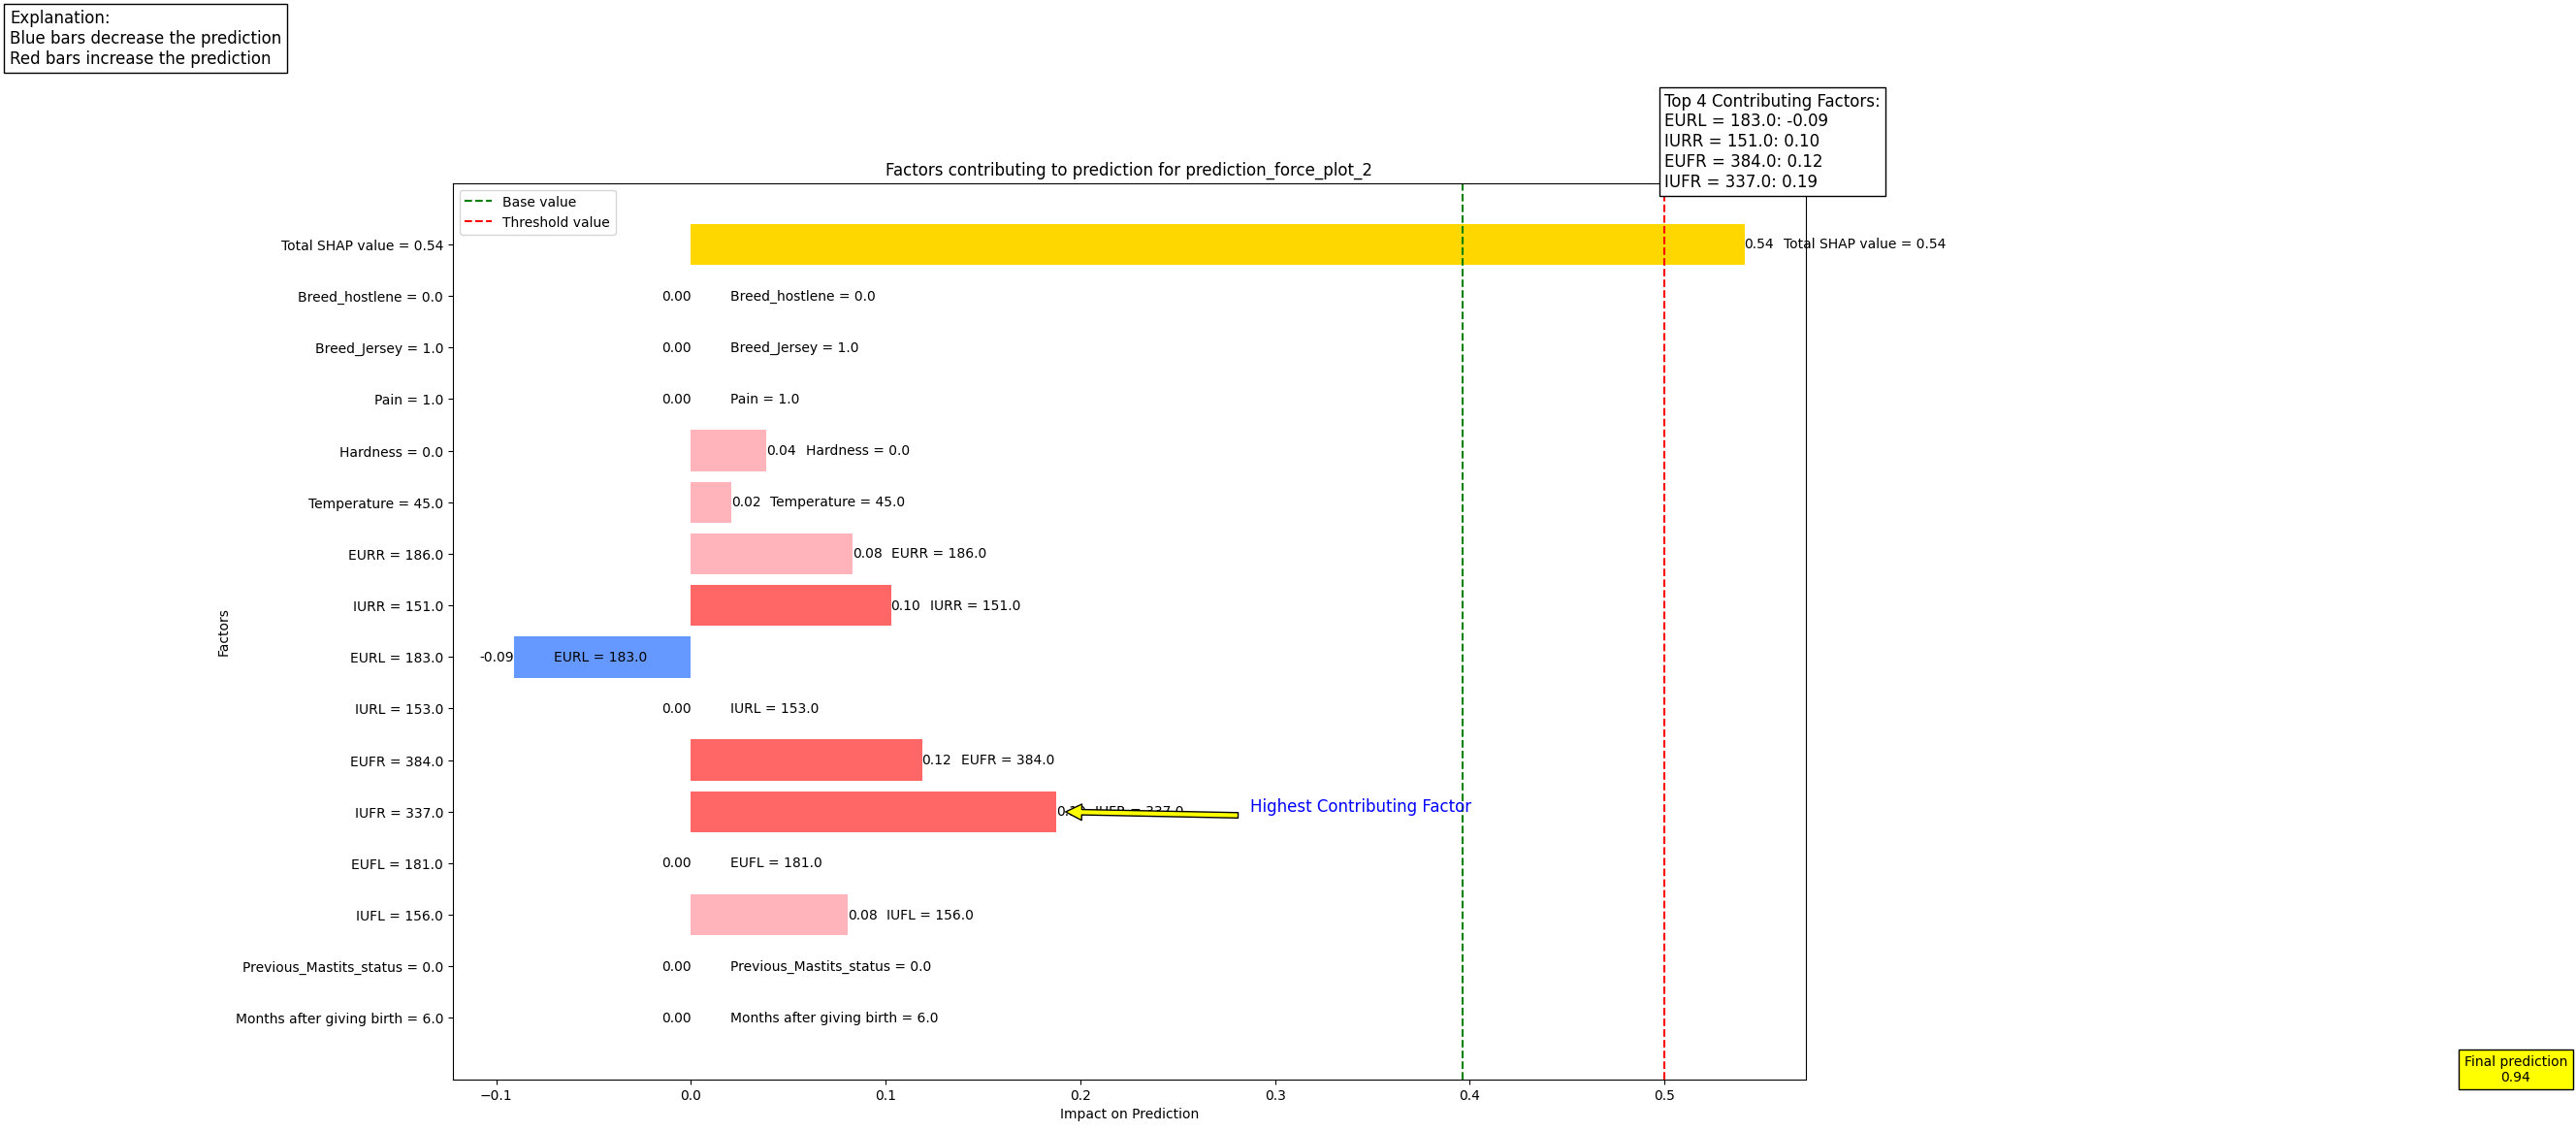

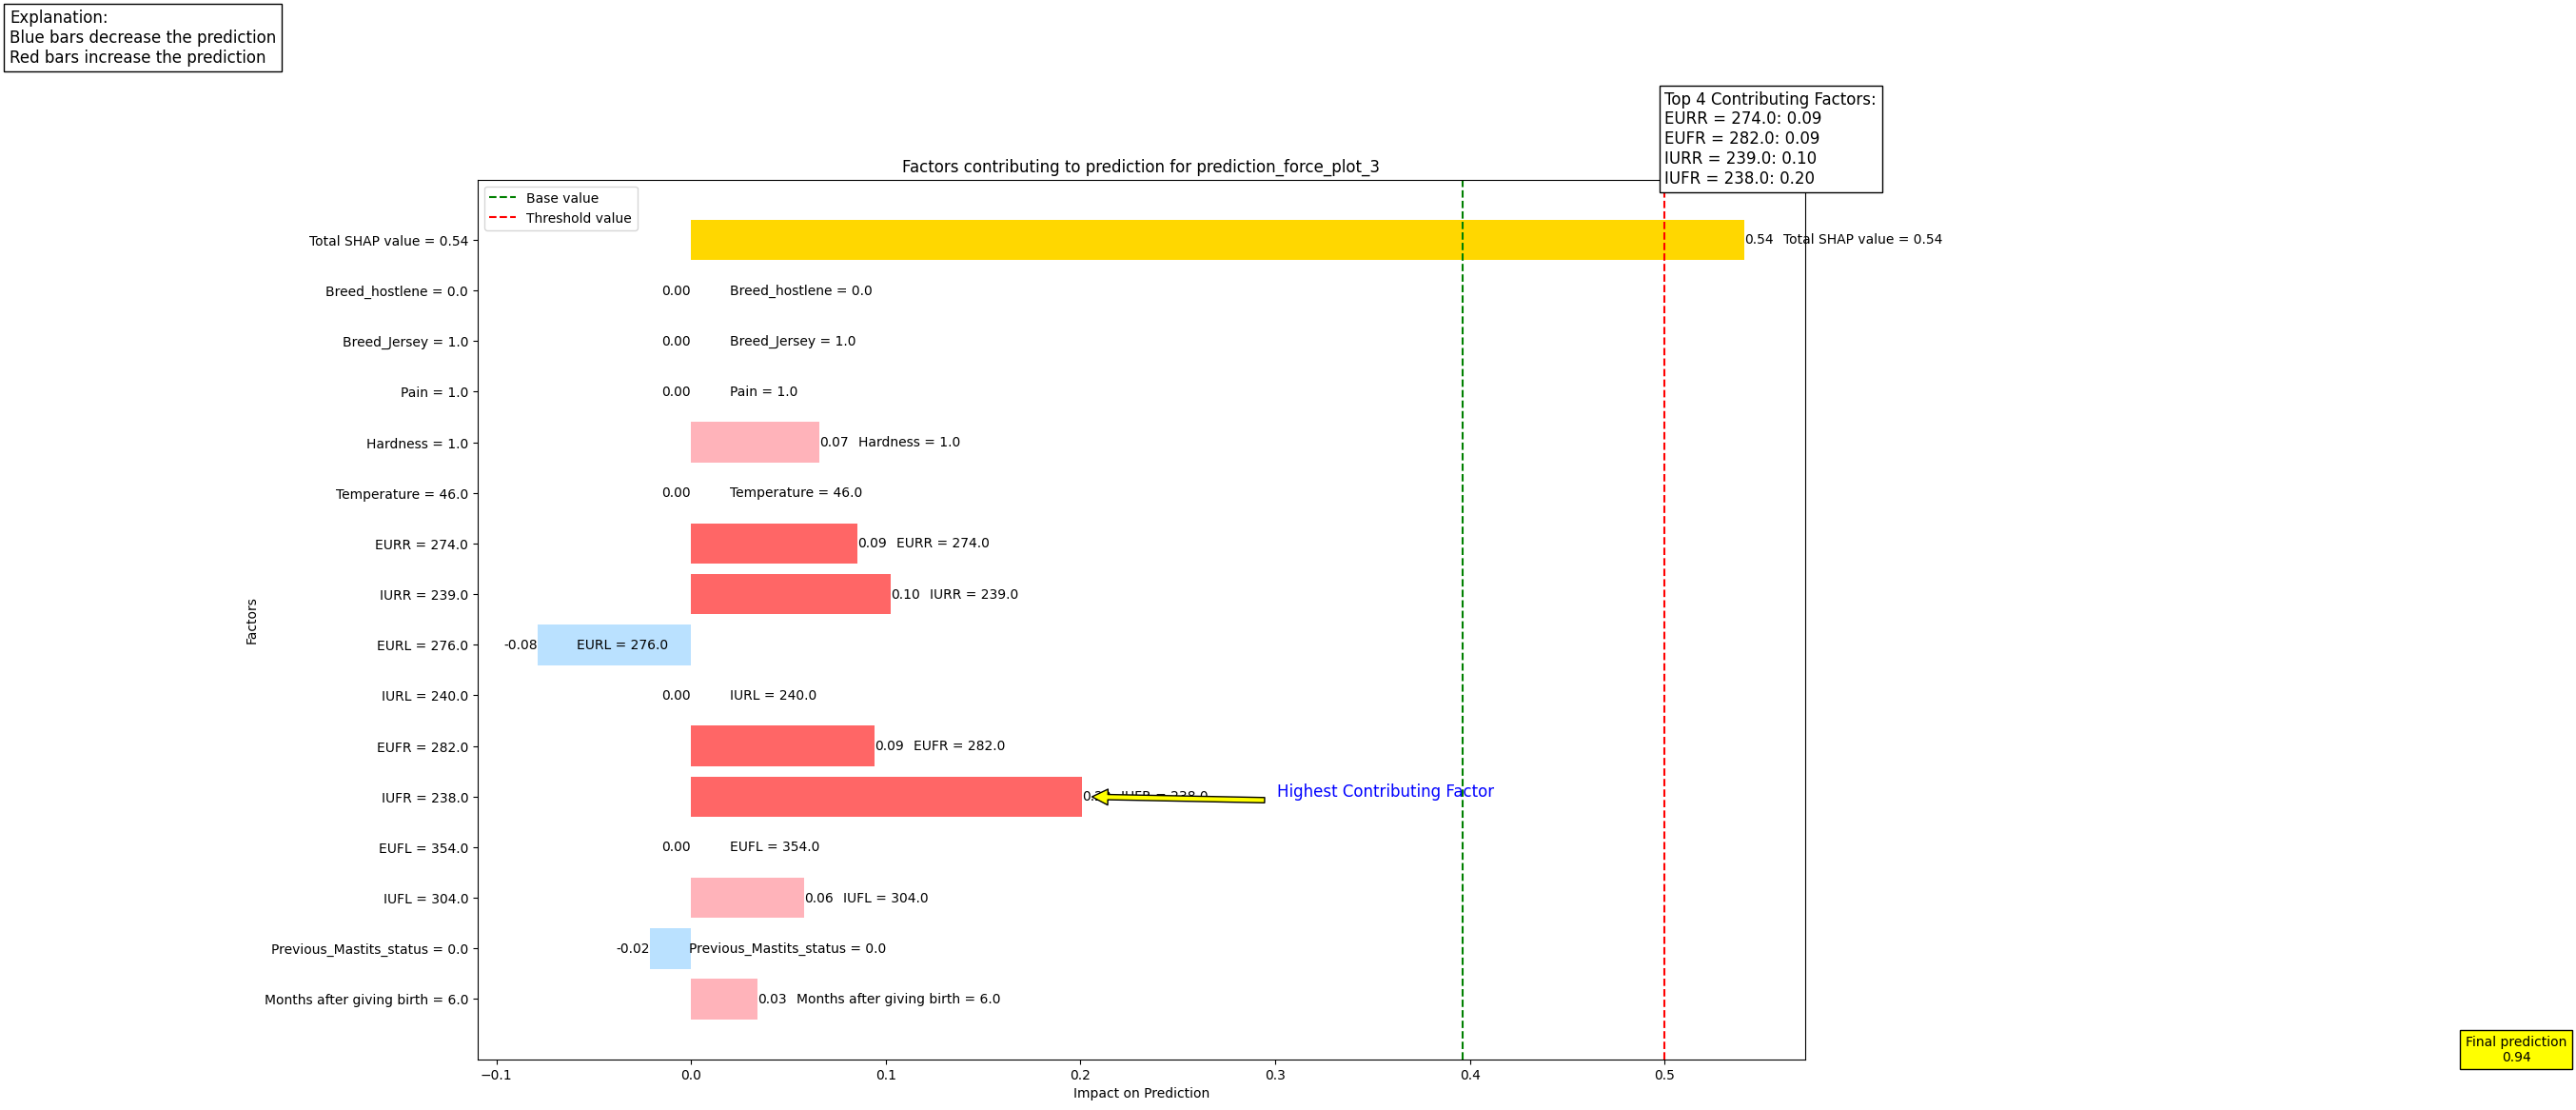

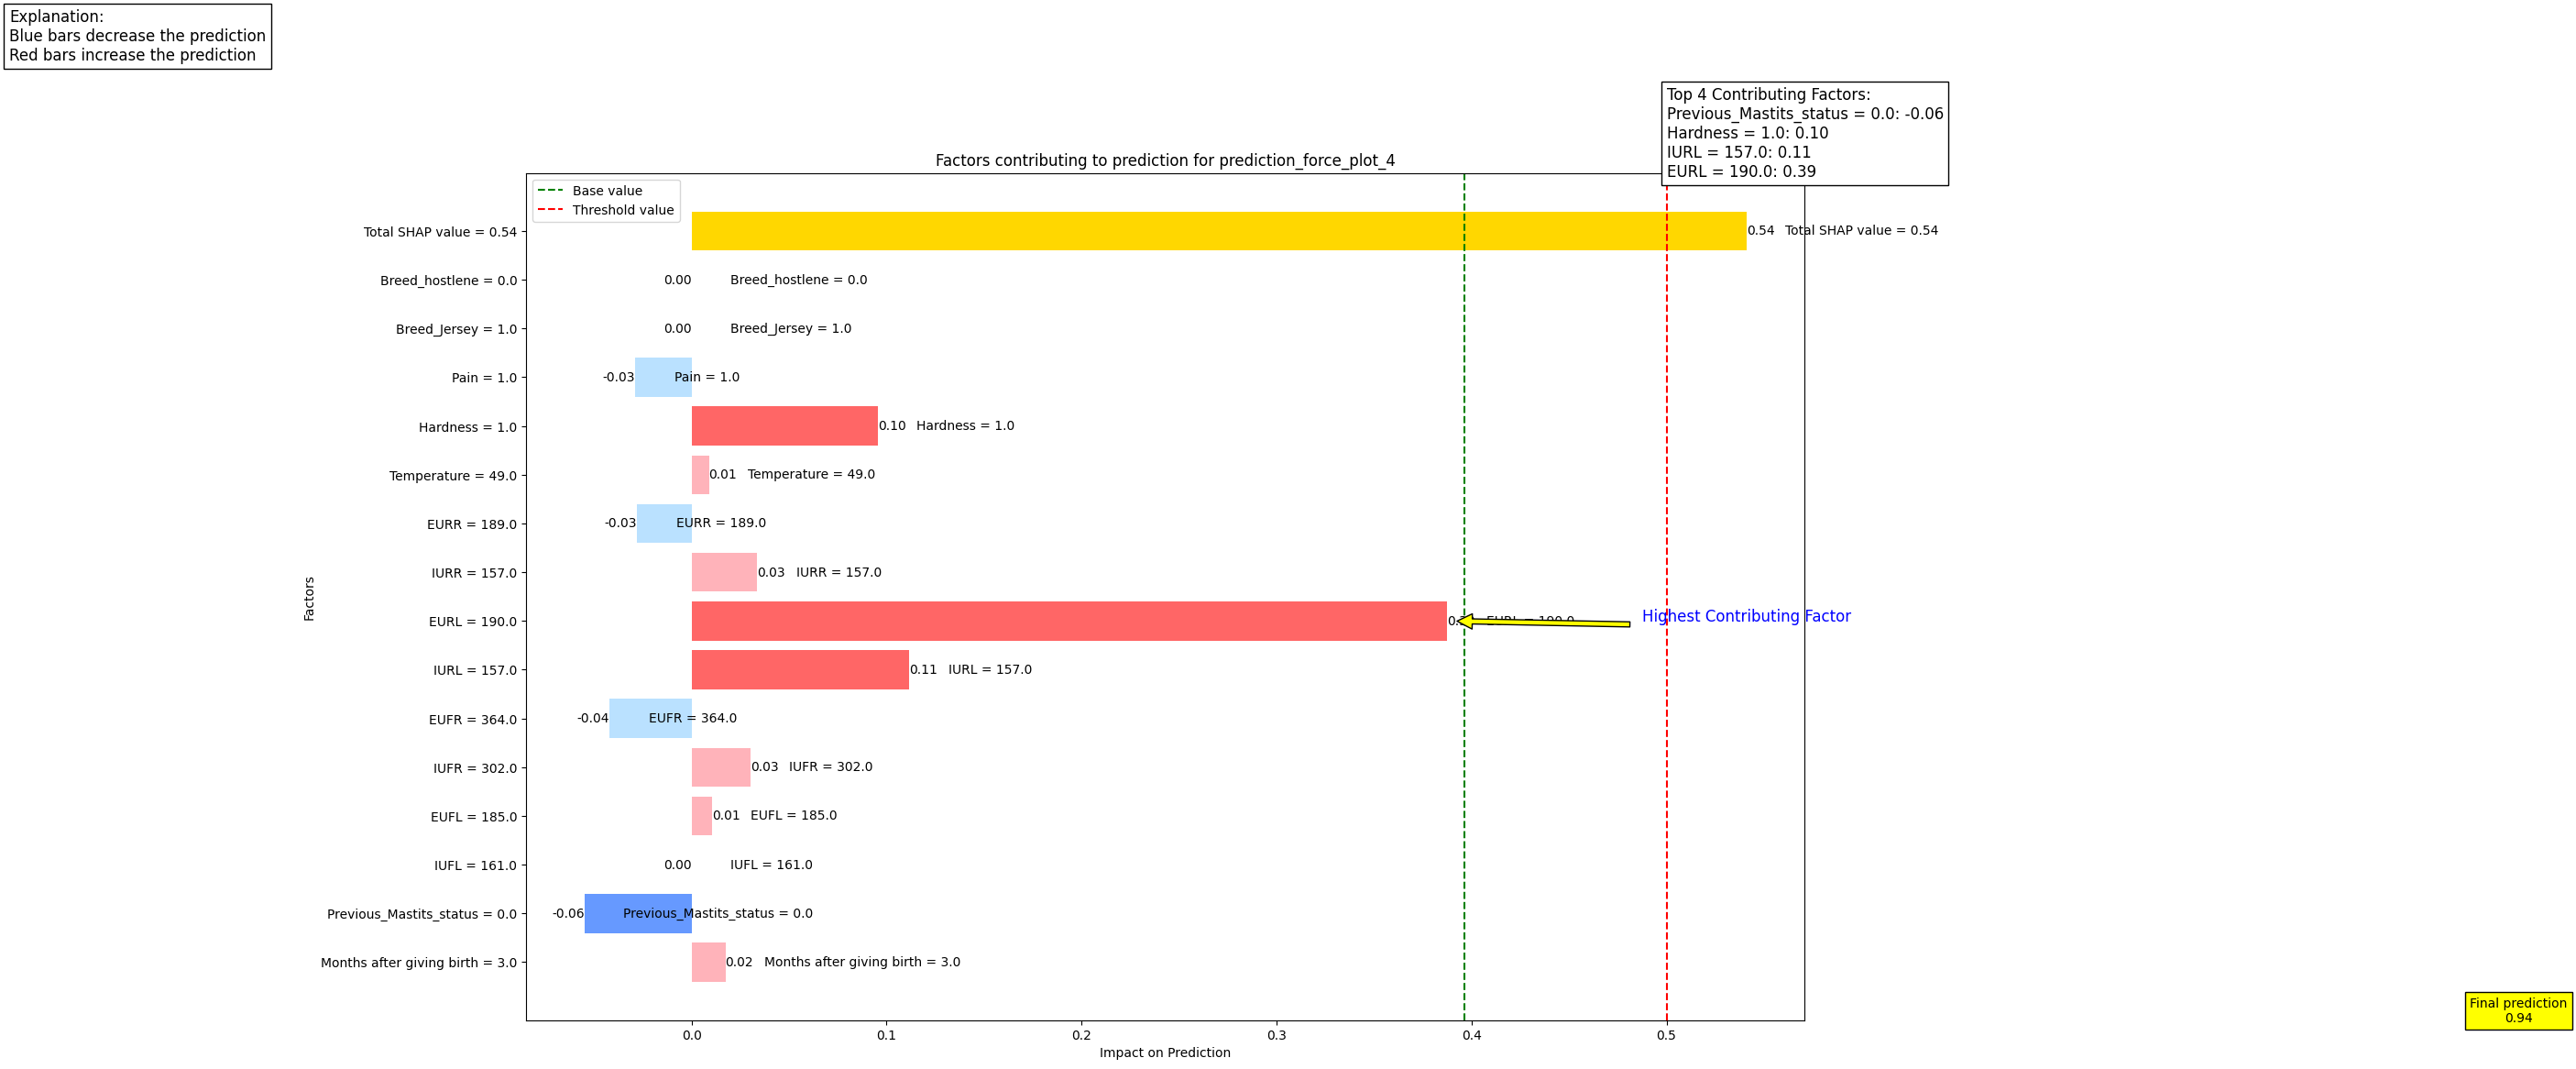

In [5]:
# Example threshold value (Adjust this as necessary)
threshold_value = 0.5

# Function to create the plot
def create_shap_plot(shap_values, features, base_value, threshold_value, filename):
    # Calculate the final prediction
    final_prediction = base_value + sum(shap_values)
    total_shap_value = sum(shap_values)

    # Identify the top 4 contributing factors by absolute SHAP value
    top_4_indices = np.argsort(np.abs(shap_values))[-4:]

    # Highlight top 4 contributing factors
    highlight_colors = ['#6699FF' if val < 0 else '#FF6666' for val in shap_values]
    colors = ['#BAE1FF' if val < 0 else '#FFB3BA' for val in shap_values]
    for i in top_4_indices:
        colors[i] = highlight_colors[i]

    # Highlight the highest contributing factor (excluding total SHAP value)
    max_shap_value = max(shap_values, key=abs)
    max_feature_index = shap_values.tolist().index(max_shap_value)

    # Add the total SHAP value as a feature
    features.append(f'Total SHAP value = {total_shap_value:.2f}')
    shap_values = np.append(shap_values, total_shap_value)
    colors.append('#FFD700')  # Gold color for the total SHAP value

    # Positions for the bars
    positions = np.arange(len(features))

    # Create the plot
    plt.figure(figsize=(18, 12))
    bars = plt.barh(positions, shap_values, color=colors)

    # Add the base value as a vertical line
    plt.axvline(base_value, color='green', linestyle='--', label='Base value')

    # Add the threshold as a horizontal line
    plt.axvline(threshold_value, color='red', linestyle='--', label='Threshold value')

    # Add annotations for the SHAP values and feature names
    for bar, feature, val in zip(bars, features, shap_values):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{val:.2f}', va='center', ha='left' if val > 0 else 'right', color='black')
        plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, feature, va='center', ha='left', color='black')

    # Add explanations for the top 4 contributing factors
    explanation_text = 'Top 4 Contributing Factors:\n'
    for i in top_4_indices:
        explanation_text += f"{features[i]}: {shap_values[i]:.2f}\n"
    plt.text(0.5, len(features) + 1, explanation_text.strip(), va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    # Highlight the highest contributing factor
    plt.annotate('Highest Contributing Factor',
                 xy=(shap_values[max_feature_index], max_feature_index),
                 xytext=(shap_values[max_feature_index] + 0.1, max_feature_index),
                 arrowprops=dict(facecolor='yellow', shrink=0.05),
                 fontsize=12, color='blue', ha='left')

    # Add the final prediction as an annotation
    plt.text(final_prediction, -1, f'Final prediction\n{final_prediction:.2f}', va='center', ha='center', color='black', bbox=dict(facecolor='yellow', edgecolor='black'))

    # Set labels and title
    plt.xlabel('Impact on Prediction')
    plt.ylabel('Factors')
    plt.title(f'Factors contributing to prediction for {filename}')
    plt.yticks(positions, features)

    # Add explanation for colors
    plt.text(-0.35, len(features) + 3, 'Explanation:\nBlue bars decrease the prediction\nRed bars increase the prediction',
             va='center', ha='left', color='black', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    plt.legend()
    plt.show()

    # Save the plot
    plt.savefig(f'{filename}.png')
    plt.close()

# Read each force plot file, generate the plot, and save it
for i, shap_values in enumerate(shap_values_list):
    feature_values = df.iloc[i].tolist()[:-2]  # Exclude 'Predicted Probability' and 'Actual Label'
    features = [f"{name} = {value}" for name, value in zip(feature_names, feature_values)]
    create_shap_plot(shap_values, features, base_value, threshold_value, f'prediction_force_plot_{i}')